In [91]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
data = pd.read_csv('data/customersatisfaction_train.csv')

In [10]:
data.head()
#target=0  : satisfied
#target=1  : unsatisfied

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [11]:
x=data.drop(labels=['ID','TARGET'],axis=1)
y=data['TARGET']
x.shape, y.shape

((76020, 369), (76020,))

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

In [48]:
x_train.shape, x_test.shape, y_train.shape

((60816, 369), (15204, 369), (60816,))

## remove constant, quasi constant, and duplicate features

In [49]:
filter=VarianceThreshold(threshold=0.01)
x_train=filter.fit_transform(x_train)
x_test=filter.transform(x_test)
x_train.shape, x_test.shape

((60816, 273), (15204, 273))

In [50]:
x_train_T=x_train.T
x_test_T=x_test.T

x_train_T=pd.DataFrame(x_train_T)
x_test_T=pd.DataFrame(x_test_T)

duplicated_features=x_train_T.duplicated()
features_to_keep=[not index for index in duplicated_features]

x_train_unique=x_train_T[features_to_keep].T
x_test_unique=x_test_T[features_to_keep].T

In [51]:
x_train_unique.shape , x_test_unique.shape

((60816, 256), (15204, 256))

In [52]:
x_train_unique.head()

,0,1,2,3,4,5,6,7,8,9,...,263,264,265,266,267,268,269,270,271,272
0,2.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
1,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85472.340000
2,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317769.240000
3,2.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76209.960000
4,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,302754.000000


In [53]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train_unique)
x_test=scaler.transform(x_test_unique)

In [54]:
x_train

array([[ 3.80478472e-02, -5.56029626e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03],
       [ 3.80478472e-02, -7.87181903e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02, -1.83006062e-01],
       [ 3.80478472e-02, -7.87181903e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  1.17499225e+00],
       ...,
       [ 3.80478472e-02,  5.99731758e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02, -2.41865113e-01],
       [ 3.80478472e-02, -1.70775831e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03],
       [ 3.80478472e-02,  2.91528722e-01,  7.65192053e+00, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03]])

In [55]:
x_train=x_train.reshape(60816,256,1)
x_test=x_test.reshape(15204,256,1)

In [56]:
y_train

65503    0
39455    0
25121    0
73436    0
68392    0
        ..
61660    0
18800    0
33109    0
51120    0
73055    0
Name: TARGET, Length: 60816, dtype: int64

In [57]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [58]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## build CNN

In [68]:
model=Sequential()
model.add(Conv1D(filters=32,kernel_size=3,activation='relu',input_shape=(256,1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv1D(filters=128,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [69]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_11 (Conv1D)           (None, 254, 32)           128       
_________________________________________________________________
batch_normalization_9 (Batch (None, 254, 32)           128       
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 127, 32)           0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 127, 32)           0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 125, 64)           6208      
_________________________________________________________________
batch_normalization_10 (Batc (None, 125, 64)           256       
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 62, 64)           

In [73]:
model.compile(optimizer=Adam(learning_rate=0.0005),loss='binary_crossentropy',metrics=['accuracy'])

In [75]:
hist=model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test),verbose=1)

Train on 60816 samples, validate on 15204 samples
Epoch 1/5
60816/60816 [==============================] - 62s 1ms/sample - loss: 0.1517 - accuracy: 0.9604 - val_loss: 0.1488 - val_accuracy: 0.9604
Epoch 2/5
60816/60816 [==============================] - 64s 1ms/sample - loss: 0.1507 - accuracy: 0.9604 - val_loss: 0.1469 - val_accuracy: 0.9604
Epoch 3/5
60816/60816 [==============================] - 63s 1ms/sample - loss: 0.1496 - accuracy: 0.9604 - val_loss: 0.1692 - val_accuracy: 0.9603
Epoch 4/5
60816/60816 [==============================] - 59s 976us/sample - loss: 0.1477 - accuracy: 0.9604 - val_loss: 0.1526 - val_accuracy: 0.9604
Epoch 5/5
60816/60816 [==============================] - 67s 1ms/sample - loss: 0.1475 - accuracy: 0.9604 - val_loss: 0.1467 - val_accuracy: 0.9604


In [76]:
model.evaluate(x_test,y_test)

15204/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.1467232586248976, 0.9604052]

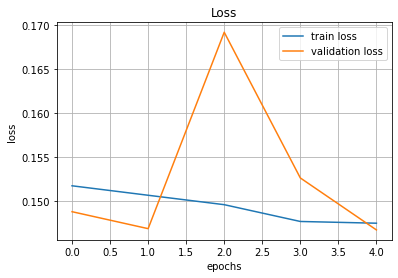

In [77]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

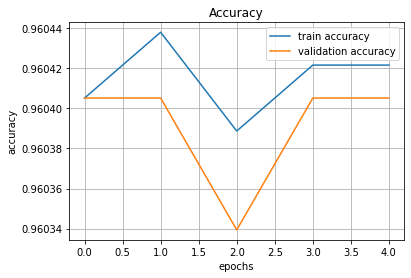

In [78]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

In [79]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [85]:
y_pred=model.predict_classes(x_test)

In [89]:
mat=confusion_matrix(y_test,y_pred)

In [90]:
mat

array([[14602,     0],
       [  602,     0]], dtype=int64)

(<Figure size 288x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

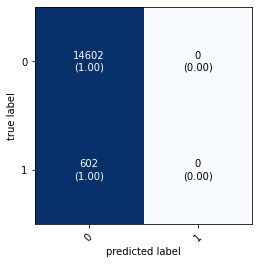

In [84]:
plot_confusion_matrix(mat,figsize=(4,4),class_names=['0','1'],show_normed=True)